In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the tips dataset
df = sns.load_dataset('tips')

The hardest day to work is: Sat
The best day to work (maximum tips in sum) is: Sat
The best day to work (maximum tips in percentage) is: Fri
Total bill by smokers and non-smokers:
smoker
Yes    1930.34
No     2897.43
Name: total_bill, dtype: float64
Average tip by table size:
size
1    1.437500
2    2.582308
3    3.393158
4    4.135405
5    4.028000
6    5.225000
Name: tip, dtype: float64


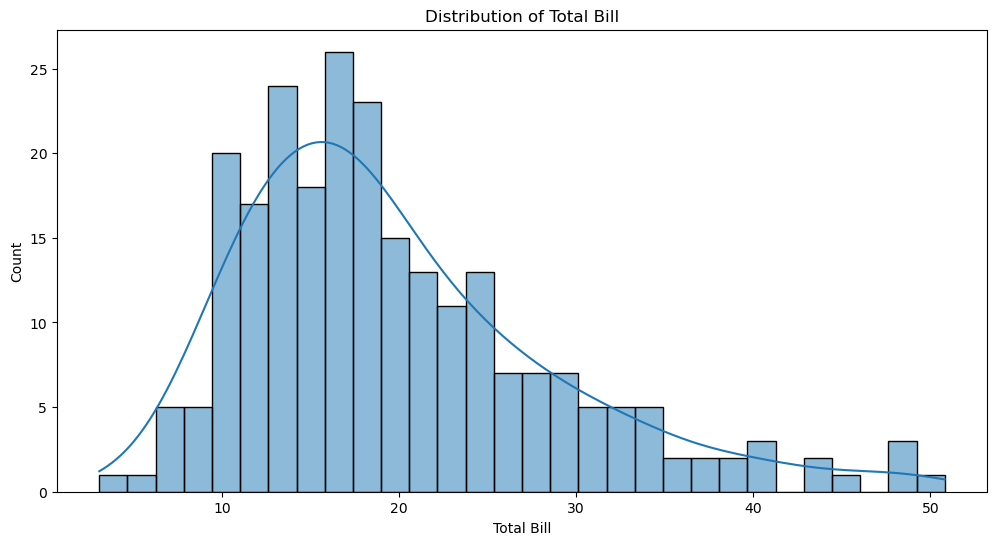

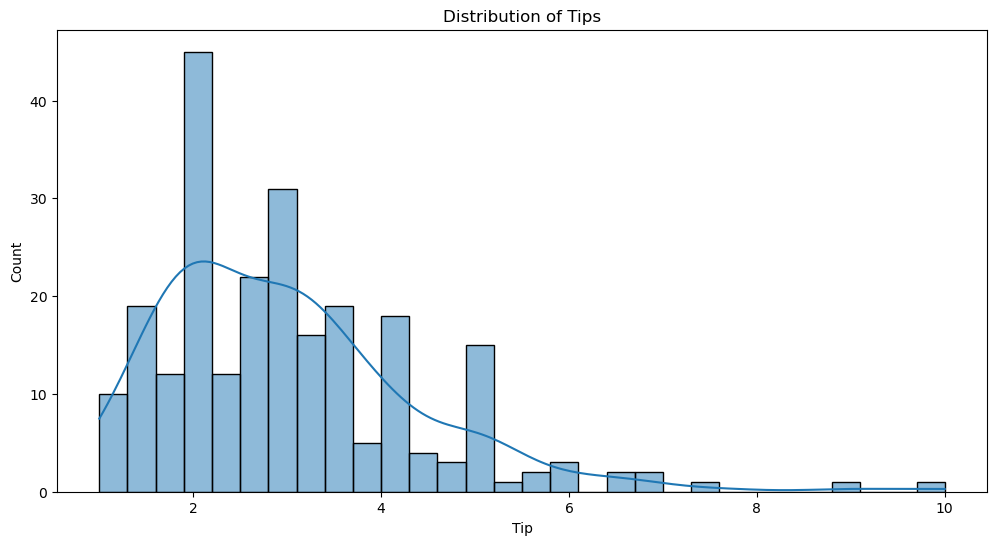

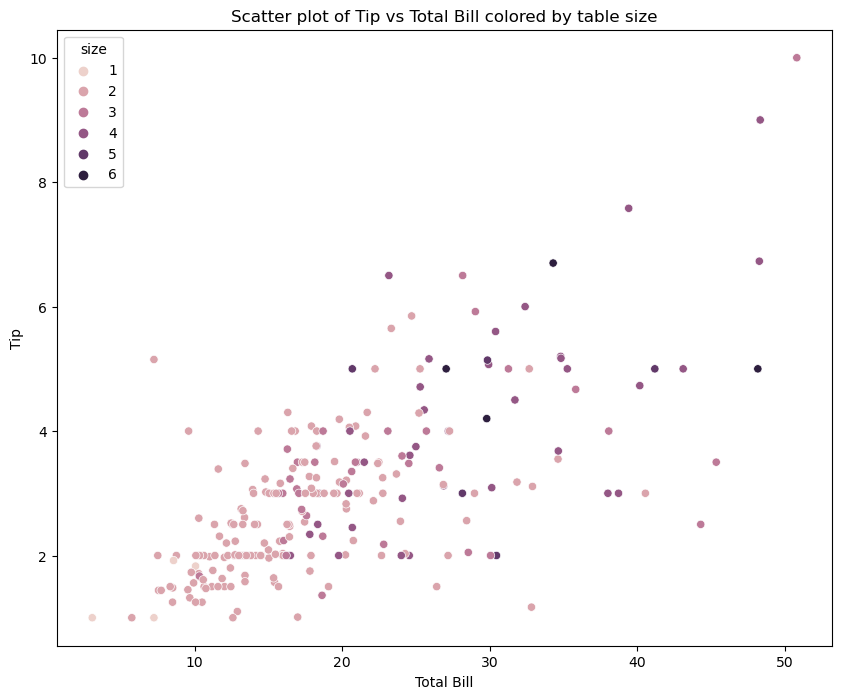

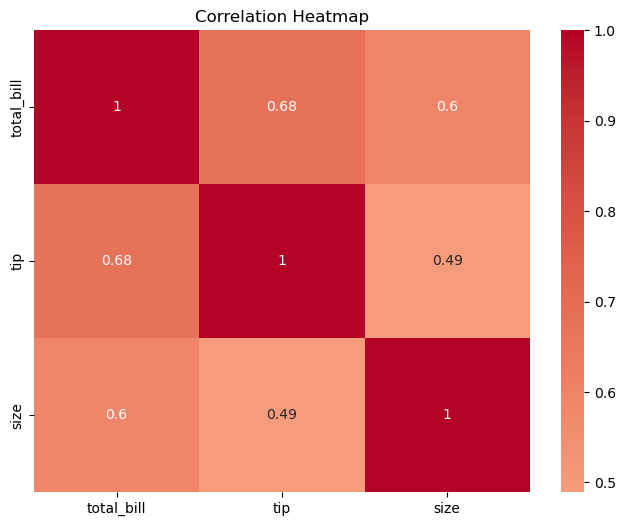

In [2]:
# What is the hardest day to work? (based on the number of tables served)
hardest_day = df['day'].value_counts().idxmax()
print(f"The hardest day to work is: {hardest_day}")

# What is the best day to work - maximum tips (sum and percents)
best_day_max_tips = df.groupby('day')['tip'].sum().idxmax()
best_day_max_tips_percent = (df.groupby('day')['tip'].sum() / df.groupby('day')['total_bill'].sum() * 100).idxmax()
print(f"The best day to work (maximum tips in sum) is: {best_day_max_tips}")
print(f"The best day to work (maximum tips in percentage) is: {best_day_max_tips_percent}")

# Who eats more (and tips more)? Smokers or non-smokers?
total_bill_by_smoker = df.groupby('smoker')['total_bill'].sum()
print("Total bill by smokers and non-smokers:")
print(total_bill_by_smoker)

# Are smaller tables better to serve?
average_tip_by_table_size = df.groupby('size')['tip'].mean()
print("Average tip by table size:")
print(average_tip_by_table_size)

# Visualize the distribution of quantitative variables
plt.figure(figsize=(12, 6))
sns.histplot(df['total_bill'], bins=30, kde=True)
plt.xlabel('Total Bill')
plt.title('Distribution of Total Bill')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(df['tip'], bins=30, kde=True)
plt.xlabel('Tip')
plt.title('Distribution of Tips')
plt.show()

# Examine the relationship among variables using scatter plot, correlation, and heatmap
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='total_bill', y='tip', hue='size')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Scatter plot of Tip vs Total Bill colored by table size')
plt.show()

correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

In [3]:
# Clean the data (no specific cleaning needed here)

# Reduce redundant information
df.drop(columns=['day', 'sex', 'smoker'], inplace=True)

# Check for missing values, and drop instances (if any)
df.dropna(inplace=True)

# Encoding categorical variable using dummy variables
days = pd.get_dummies(df['time'], drop_first=True)
df = pd.concat([df, days], axis=1)
df.drop(columns=['time'], inplace=True)

In [4]:
# Update the feature selection based on the current columns in the DataFrame
X = df[['total_bill', 'size', 'Dinner']] # Features
y = df['tip'] # Target variable

# Split the data into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [5]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [6]:
predictions = model.predict(X_test)

In [7]:
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared: {r2}")

Mean Squared Error (MSE): 1.240980406385854
R-squared: 0.5377959249624835
